In [1]:
import unittest
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import ward

from skbio import TreeNode, DistanceMatrix
from gneiss.plot._radial import radialplot
from gneiss.plot._dendrogram import UnrootedDendrogram

exp_edges = {'dest_node': ['0', '1', '2', 'y3'],
             'edge_color': ['#00FF00', '#00FF00',
                            '#00FF00', '#FF0000'],
             'edge_width': [2, 2, 2, 2],
             'src_node': ['y3', 'y4', 'y3', 'y4'],
             'x0': [338.2612593838583,
                    193.1688862557773,
                    338.2612593838583,
                    193.1688862557773],
             'x1': [487.5, 12.499999999999972,
                    324.89684138234867, 338.2612593838583],
             'y0': [271.7282256126416,
                    365.95231443706376,
                    271.7282256126416,
                    365.95231443706376],
             'y1': [347.7691620070637,
                    483.2800610261029,
                    16.719938973897143,
                    271.7282256126416]}

exp_nodes = {'child0': [np.nan, np.nan, np.nan, '0', '1'],
             'child1': [np.nan, np.nan, np.nan, '2', 'y3'],
             'color': ['#1C9099', '#1C9099', '#1C9099',
                       '#FF999F', '#FF999F'],
             'hover_var': [None, None, None, None, None],
             'is_tip': [True, True, True, False, False],
             'node_size': [10, 10, 10, 10, 10],
             'x': [487.5,
                   12.499999999999972,
                   324.89684138234867,
                   338.26125938385832,
                   193.16888625577729],
             'y': [347.7691620070637,
                   483.28006102610289,
                   16.719938973897143,
                   271.72822561264161,
                   365.95231443706376]}
np.random.seed(0)
num_otus = 3  # otus
x = np.random.rand(num_otus)
dm = DistanceMatrix.from_iterable(x, lambda x, y: np.abs(x-y))
lm = ward(dm.condensed_form())
t = TreeNode.from_linkage_matrix(lm, np.arange(len(x)).astype(np.str))
t = UnrootedDendrogram.from_tree(t)
# incorporate colors in tree
for i, n in enumerate(t.postorder(include_self=True)):
    if not n.is_tip():
        n.name = "y%d" % i
        n.color = '#FF999F'
        n.edge_color = '#FF0000'
        n.node_size = 10
    else:
        n.color = '#1C9099'
        n.edge_color = '#00FF00'
        n.node_size = 10
    n.length = np.random.rand()*3
    n.edge_width = 2
p = radialplot(t, node_color='color', edge_color='edge_color',
               node_size='node_size', edge_width='edge_width')


In [2]:
from bokeh.io import show
show(p)

In [4]:
from gneiss.plot import heatmap
from gneiss.plot._heatmap import _sort_table

import pandas as pd
import pandas.util.testing as pdt
from skbio import TreeNode, DistanceMatrix
from scipy.cluster.hierarchy import ward
from gneiss.plot._dendrogram import SquareDendrogram
from gneiss.util import block_diagonal
from gneiss.cluster import rank_linkage
import numpy as np

In [5]:
table = pd.DataFrame(np.random.random((5, 5)),
                          index=['0', '1', '2', '3', '4'],
                          columns=['0', '1', '2', '3', '4'])

num_otus = 5  # otus
x = np.random.rand(num_otus)
dm = DistanceMatrix.from_iterable(x, lambda x, y: np.abs(x-y))
lm = ward(dm.condensed_form())
t = TreeNode.from_linkage_matrix(lm, np.arange(len(x)).astype(np.str))
t = SquareDendrogram.from_tree(t)
md = pd.Series(['a', 'a', 'a', 'b', 'b'],
                index=['0', '1', '2', '3', '4'])
for i, n in enumerate(t.postorder()):
    if not n.is_tip():
        n.name = "y%d" % i
    n.length = np.random.rand()*3

highlights = pd.DataFrame({'y8': ['#FF0000', '#00FF00'],
                           'y6': ['#0000FF', '#F0000F']}).T


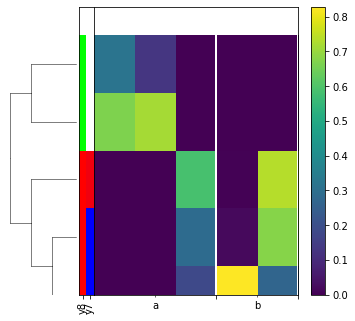

In [10]:
table = pd.DataFrame(block_diagonal(ncols=5, nrows=5, nblocks=2),
                     index=['0', '1', '2', '3', '4'],
                     columns=['0', '1', '2', '3', '4'])
t = rank_linkage(pd.Series([1, 2, 3, 4, 5],
                           index=['0', '1', '2', '3', '4']))
t = SquareDendrogram.from_tree(t)
md = pd.Series(['a', 'a', 'a', 'b', 'b'],
               index=['0', '1', '2', '3', '4'])
for i, n in enumerate(t.postorder()):
    if not n.is_tip():
        n.name = "y%d" % i
    n.length = np.random.rand()*3
    
highlights = pd.DataFrame({'y8': ['#FF0000', '#00FF00'],
                           'y7': ['#0000FF', '#F0000F']}).T

fig = heatmap(table, t, md, highlights)

In [11]:
print(t.ascii_art())

                    /-0
          /y2------|
         |          \-1
-y8------|
         |          /-4
          \y7------|
                   |          /-2
                    \y6------|
                              \-3


In [9]:
table

,0,1,2,3,4
0,0.120197,0.296140,0.000000,0.000000,0.000000
1,0.118728,0.317983,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.414263,0.064147,0.692472
3,0.000000,0.000000,0.566601,0.265389,0.523248
4,0.000000,0.000000,0.093941,0.575946,0.929296
